# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import pickle
from pandas.io.parsers import read_csv
import sys

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

X_train_original = X_train
X_test_original = X_test

In [2]:
def print_progress(iteration, total):
    str_format = "{0:.0f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(100 * iteration / float(total)))
    bar = '█' * filled_length + '-' * (100 - filled_length)

    sys.stdout.write('\r |%s| %s%%' % (bar, percents)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

n_train = len(X_train)
n_test = len(X_test)

image_shape = X_train[0].shape
image_size = image_shape[0]
n_classes = len(train['labels'])

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Image width & height", image_size)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Image width & height 32
Number of classes = 39209


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
import random
import numpy as np
import cv2
import tensorflow as tf
import matplotlib
matplotlib.use('TkAgg', warn = False)
import tensorflow as tf

# Visualizations will be shown in the notebook.
%matplotlib inline

In [5]:
## Create a dictionary of categories
with open('signnames.csv', mode='r') as f:
    lines = f.readlines()
    lines.pop(0)
    lines = [line.replace("\n", '') for line in lines]
    lines = [line.split(",") for line in lines]
    classes = {int(rows[0]):rows[1] for rows in lines}

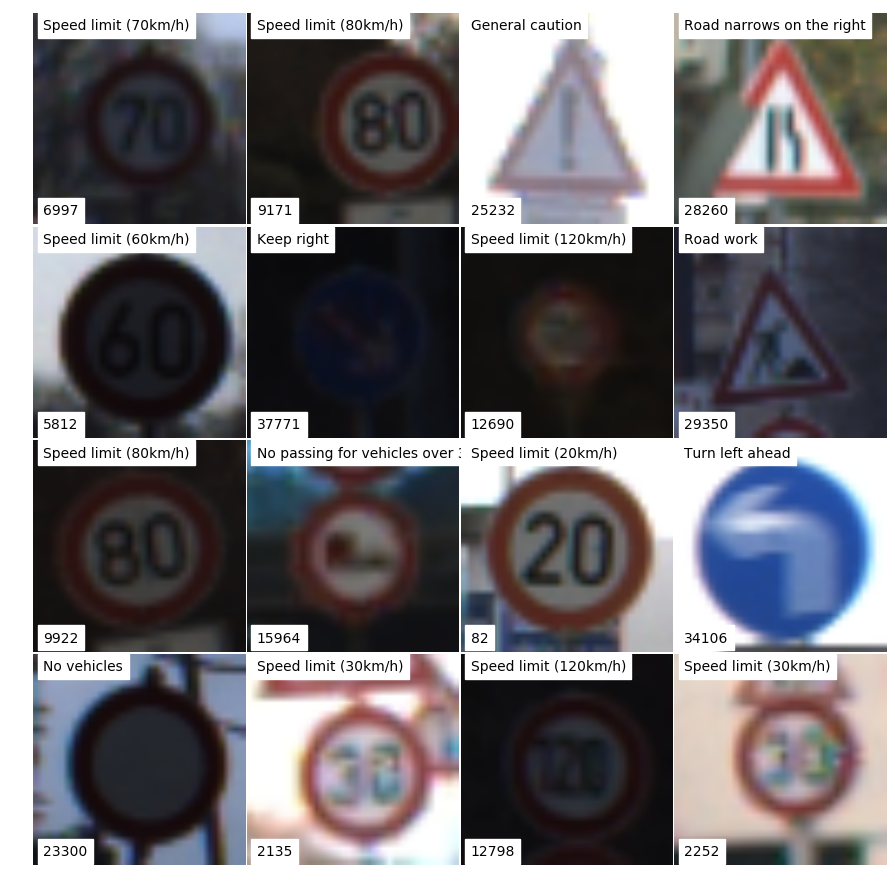

In [6]:
# Select random images and plot a set of random images
import matplotlib.gridspec as gridspec 

# show random images from the whole set or of a specific class
def plotImages(m,n,images, labels, indexes, class_id=None, figsize=(11,11)):
    plt.figure(figsize = figsize)
    gs1 = gridspec.GridSpec(m,n)
    gs1.update(wspace=0.01, hspace=0.01)

    for i in range(len(images)):
        ax = plt.subplot(gs1[i])
        if len(images[i].shape) == 2:
            plt.imshow(images[i], cmap='gray')
        else:
            plt.imshow(images[i])
        plt.text(1,2,classes[labels[i]], backgroundcolor='w')
        plt.text(1,30,indexes[i], backgroundcolor='w')
        plt.axis('off')
    plt.show()
    
def randomImage(X,y,class_id=None):
    if class_id:
        sclass = np.argwhere(y == class_id)
        index = sclass[random.randint(0, len(sclass)-1)][0]
    else:
        index = random.randint(0, len(y))
    return X[index], y[index], index
    
def randomImages(n, X, y, class_id=None):
    images = []
    labels = []
    indexes = []
    for i in range(n):
        image, label, index = randomImage(X,y,class_id)
        images.append(image)
        labels.append(label)
        indexes.append(index)
    return images, labels, indexes
    
# Test code
images, labels, indexes = randomImages(16, X_train_original, y_train)
plotImages(4,4, images, labels, indexes)


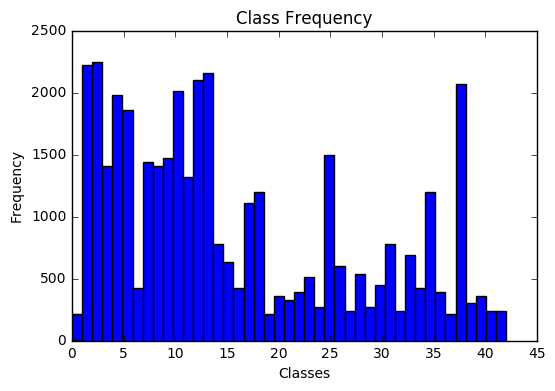

In [7]:
# Display the frequency of the different classes
plt.hist(y_train, bins=43)
plt.title('Class Frequency')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()


In [8]:
# Table of categories sorted by frequency
class_count = {}
total = 0
for label in y_train:
    total += 1
    if label in class_count:
        class_count[label] += 1
    else:
        class_count[label] = 1

import operator
sorted_x = sorted(class_count.items(), key=operator.itemgetter(1))
sorted_x.reverse()
for item in sorted_x:
    print(item[0], item[1], classes[item[0]])
    
print('total: ', total)

2 2250 Speed limit (50km/h)
1 2220 Speed limit (30km/h)
13 2160 Yield
12 2100 Priority road
38 2070 Keep right
10 2010 No passing for vehicles over 3.5 metric tons
4 1980 Speed limit (70km/h)
5 1860 Speed limit (80km/h)
25 1500 Road work
9 1470 No passing
7 1440 Speed limit (100km/h)
8 1410 Speed limit (120km/h)
3 1410 Speed limit (60km/h)
11 1320 Right-of-way at the next intersection
35 1200 Ahead only
18 1200 General caution
17 1110 No entry
31 780 Wild animals crossing
14 780 Stop
33 689 Turn right ahead
15 630 No vehicles
26 600 Traffic signals
28 540 Children crossing
23 510 Slippery road
30 450 Beware of ice/snow
34 420 Turn left ahead
16 420 Vehicles over 3.5 metric tons prohibited
6 420 End of speed limit (80km/h)
36 390 Go straight or right
22 390 Bumpy road
40 360 Roundabout mandatory
20 360 Dangerous curve to the right
21 330 Double curve
39 300 Keep left
29 270 Bicycles crossing
24 270 Road narrows on the right
42 240 End of no passing by vehicles over 3.5 metric tons
41 24

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [9]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [10]:
def equalizeChannels(image):
    img = np.copy(image)
    img[:,:,0] = cv2.equalizeHist(image[:,:,0])
    img[:,:,1] = cv2.equalizeHist(image[:,:,1])
    img[:,:,2] = cv2.equalizeHist(image[:,:,2])
    return img
    
def equalizeImage(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
    return cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)

def equalizeGray(img):
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.equalizeHist(img)
    return img


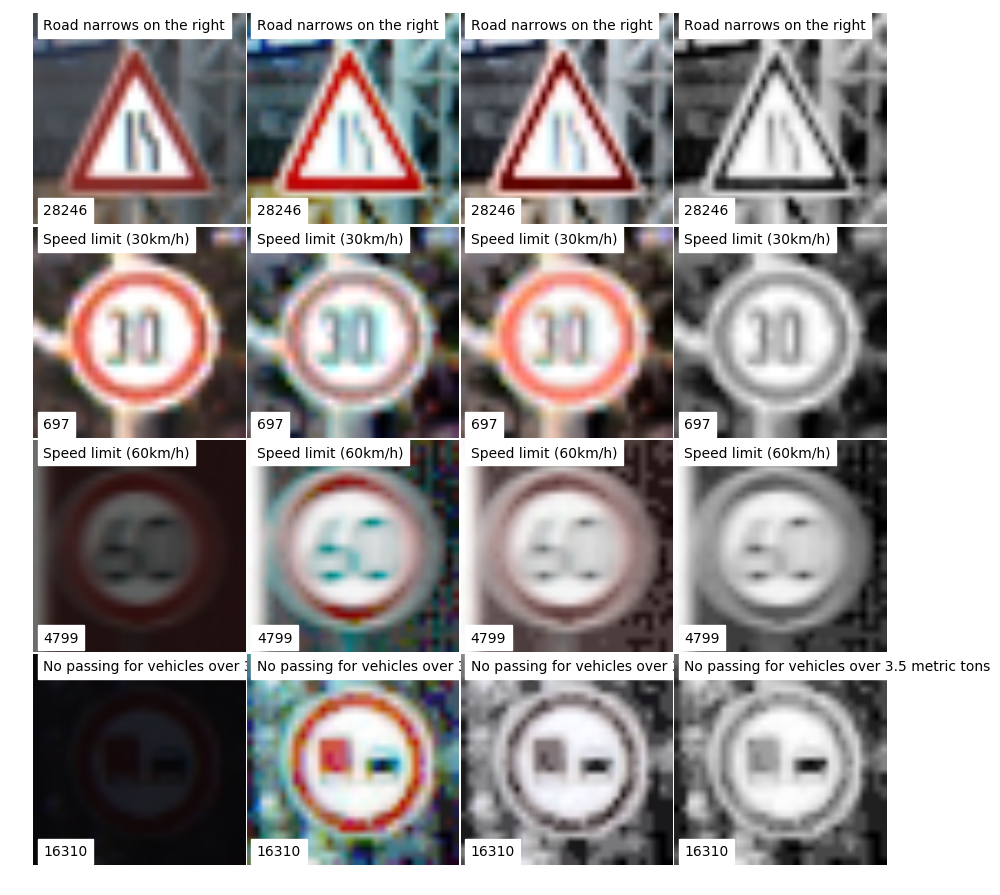

In [11]:
# Visualize what type of preprocessing would be better for the images
images, labels, indexes = randomImages(4, X_train_original, y_train)
pimages, plabels, pindexes = [], [], []
for i in range(len(images)):
    img, label, index = images[i], labels[i], indexes[i]
    img1 = equalizeChannels(img)
    img2 = equalizeImage(img)
    img3 = equalizeGray(img)
    pimages += [img, img1, img2, img3]
    plabels += [label, label, label, label]
    pindexes += [index, index, index, index]
plotImages(4,4,pimages, plabels, pindexes)

In [12]:
# Looking at the above, I believe that equalizing the image gives makes the images look the best
# We processs all the images the same way in the test set and the train set

X_train = np.array([equalizeImage(X_train_original[i]) for i in range(len(X_train_original))])
X_test = np.array([equalizeImage(X_test_original[i]) for i in range(len(X_test_original))])

pickle.dump({"images": X_train, "labels": y_train}, open('train_preprocessed.p','wb'))
pickle.dump({"images": X_test, "labels": y_test}, open('test_preprocessed.p','wb'))

print("Images Processed")

Images Processed


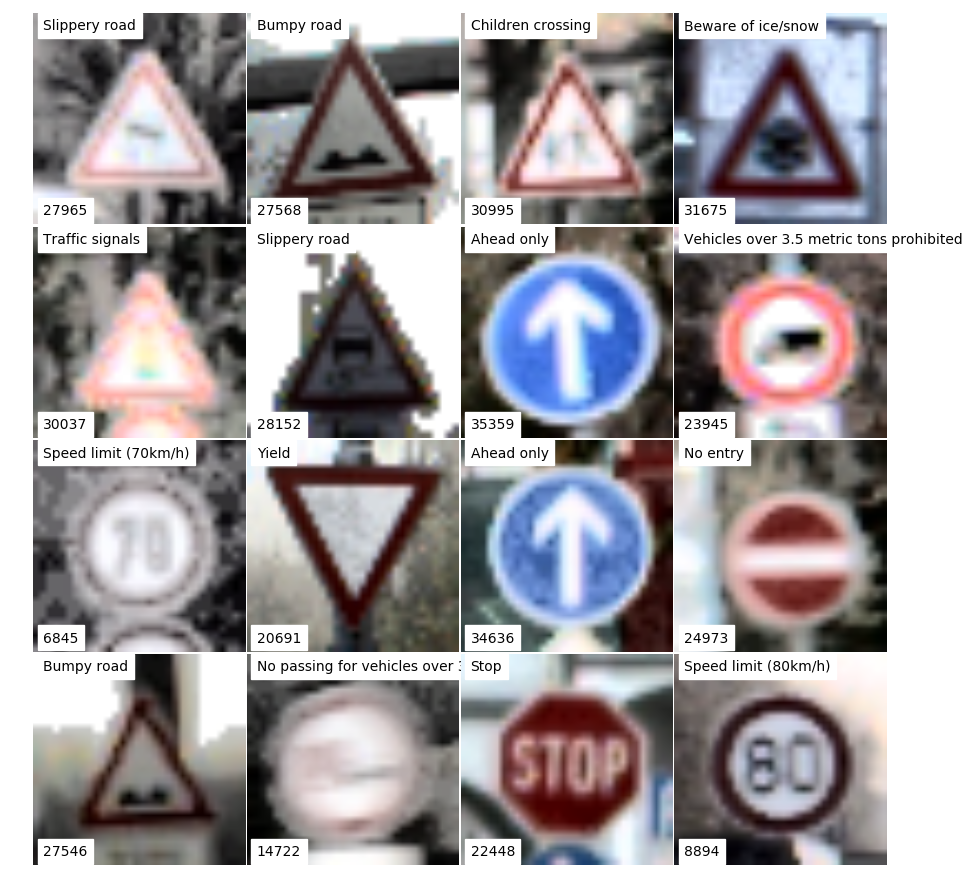

In [13]:
# Display 16 random images from processed data
images, labels, indexes = randomImages(16, X_train, y_train)
plotImages(4,4, images, labels, indexes)

max mean:  192.098854855 min mean: 93.8454691525
max std:  82.8460457562 min std: 60.7097991446
overall mean: 133.149445984 Overall std:  74.738547971


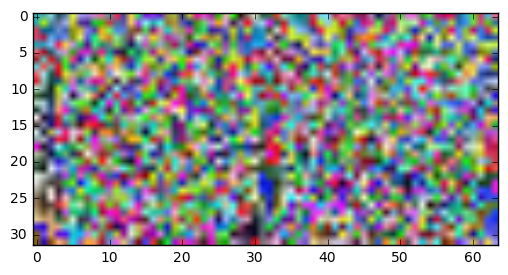

In [14]:
# Normalization - calculate the mean and stddev
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)

pickle.dump({"mean" : mean, "std": std}, open("normalization.p", "wb"))

# visualize the mean and std
mean_std = np.concatenate((mean,std), axis=1)
plt.imshow(mean_std)
print("max mean: ",np.max(mean), "min mean:", np.min(mean))
print("max std: ",np.max(std), "min std:", np.min(std))
print("overall mean:", np.mean(X_train), "Overall std: ", np.std(X_train))

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

In [15]:
def scaleImage(image, scale):
    rows,cols,ch = image.shape

    t1 = np.float32([[0,0],[0,5],[5,0]])
    t2 = np.float32([[0,0],[0,5*scale],[5*scale,0]])
    S = cv2.getAffineTransform(t1, t2)
    image = cv2.warpAffine(image,S,(cols,rows))
    
    return image

def rotateImage(image, angle):
    rows,cols,ch = image.shape
    R = cv2.getRotationMatrix2D((cols/2,rows/2),angle,1)
    image = cv2.warpAffine(image,R,(cols,rows))
    return image

def translateImage(image, offsetX, offsetY):
    rows,cols,ch = image.shape
    T = np.float32([[1,0,offsetX],[0,1,offsetY]])
    image = cv2.warpAffine(image,T,(cols,rows))
    return image

def jitterImage(image):
    scale = np.random.uniform(low=0.9, high=1.1)
    angle = np.random.uniform(low=-17,high=17)
    offsetX = np.random.uniform(low=-2, high=2)
    offsetY = np.random.uniform(low=-2, high=2)
    
    image = scaleImage(image, scale)
    image = rotateImage(image, angle)
    image = translateImage(image, offsetX, offsetY)
    return image

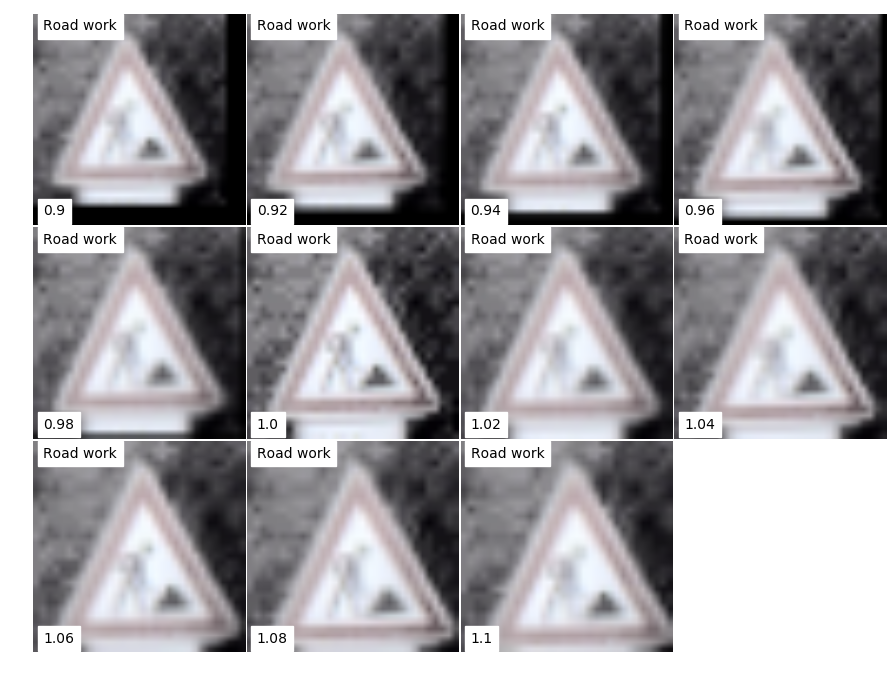

In [16]:
# Visualize how much would be good to scale
image, label, index = randomImage(X_train, y_train)
pimages, plabels, pindexes = [], [], []

for i in np.arange(0.9,1.1,0.02):
    img = scaleImage(image, i)
    pimages.append(img)
    plabels.append(label)
    pindexes.append(i)
    
plotImages(4,4,pimages, plabels, pindexes)

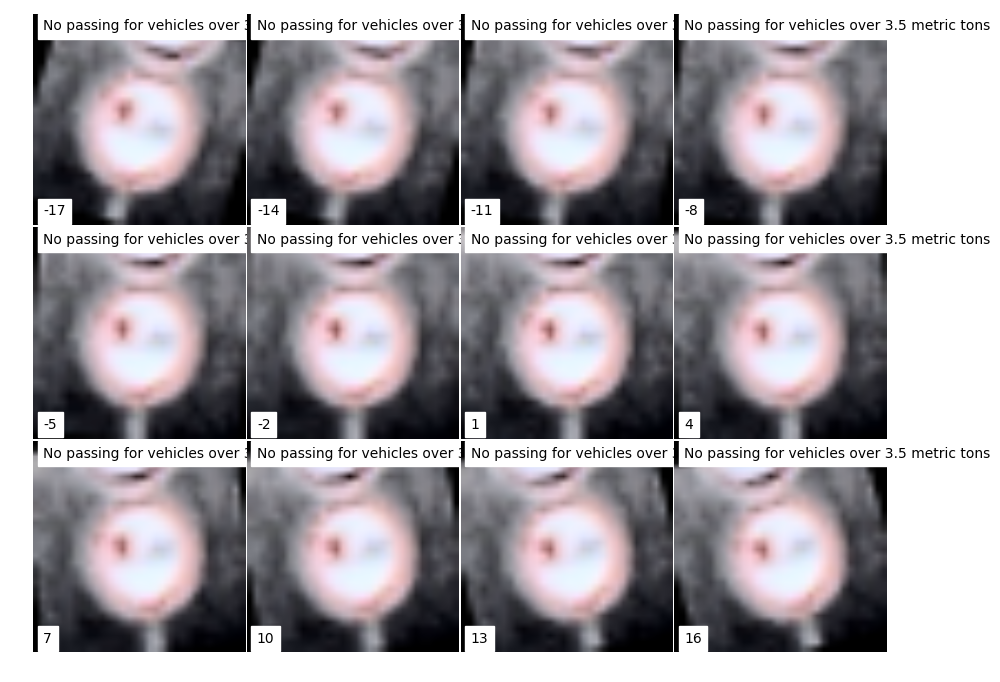

In [17]:
# Visualize how much would be good to rotate
image, label, index = randomImage(X_train, y_train)
pimages, plabels, pindexes = [], [], []

for i in np.arange(-17,17,3):
    img = rotateImage(image, i)
    pimages.append(img)
    plabels.append(label)
    pindexes.append(i)
    
plotImages(4,4,pimages, plabels, pindexes)

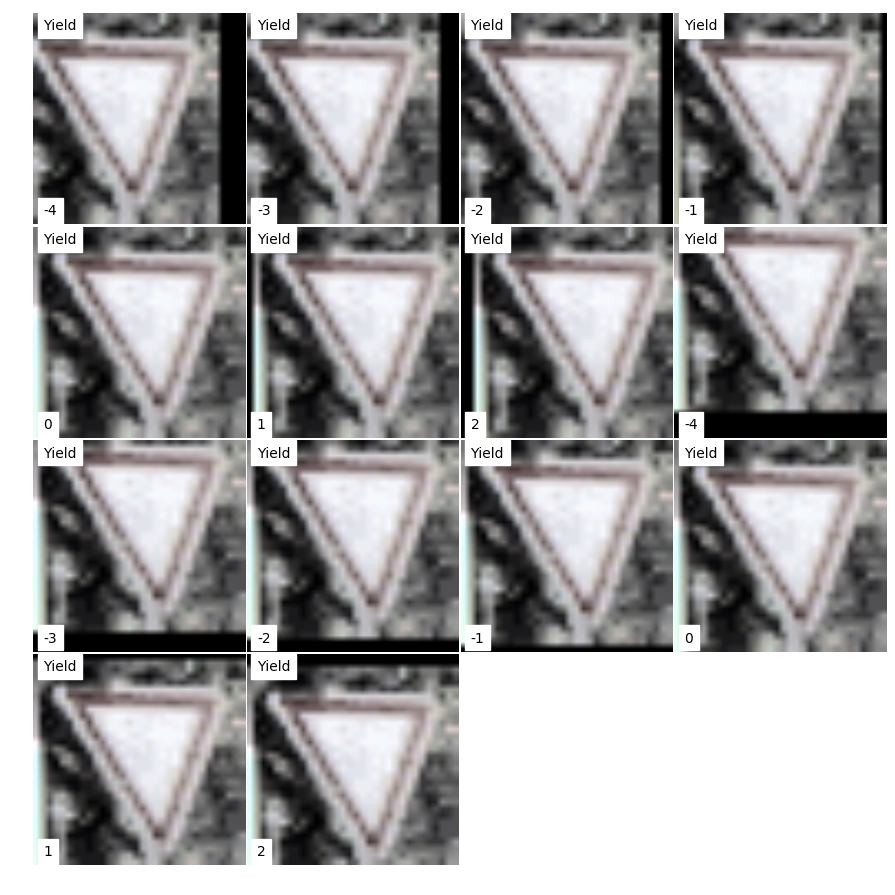

In [18]:
# Visualize how much would be good to scale
image, label, index = randomImage(X_train, y_train)
pimages, plabels, pindexes = [], [], []

for i in range(-4,3,1):
    img = translateImage(image, i, 0)
    pimages.append(img)
    plabels.append(label)
    pindexes.append(i)

for i in range(-4,3,1):
    img = translateImage(image, 0, i)
    pimages.append(img)
    plabels.append(label)
    pindexes.append(i)
    
plotImages(4,4,pimages, plabels, pindexes)

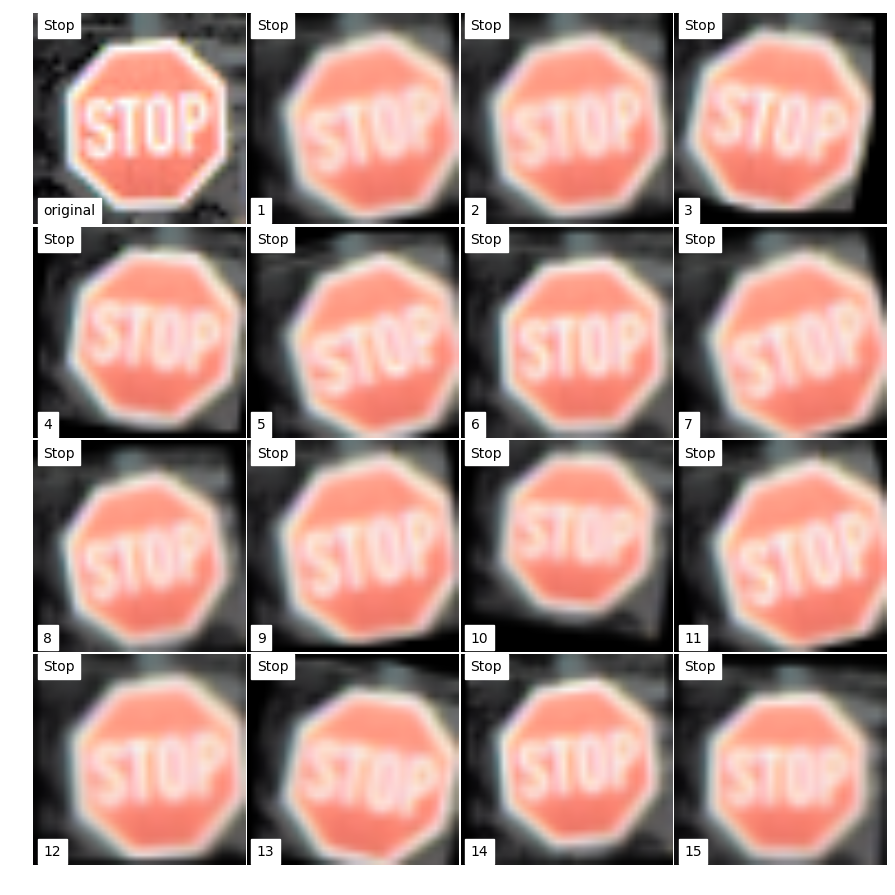

In [19]:
# Visualize Jittered images
image, label, index = randomImage(X_train, y_train)
pimages, plabels, pindexes = [], [], []

pimages.append(image)
plabels.append(label)
pindexes.append("original")

for i in range(1,16):
    img = jitterImage(image)
    pimages.append(img)
    plabels.append(label)
    pindexes.append(i)

plotImages(4,4,pimages, plabels, pindexes)

In [20]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

X_train_preprocessed, y_train_preprocessed = X_train, y_train

X_train, y_train = shuffle(X_train, y_train)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2)

print("Training Size: ", len(y_train))
print("Validation Size: ", len(y_validation))

Training Size:  31367
Validation Size:  7842


X_aug size:  (156835, 32, 32, 3)
y_aug size:  (156835,)


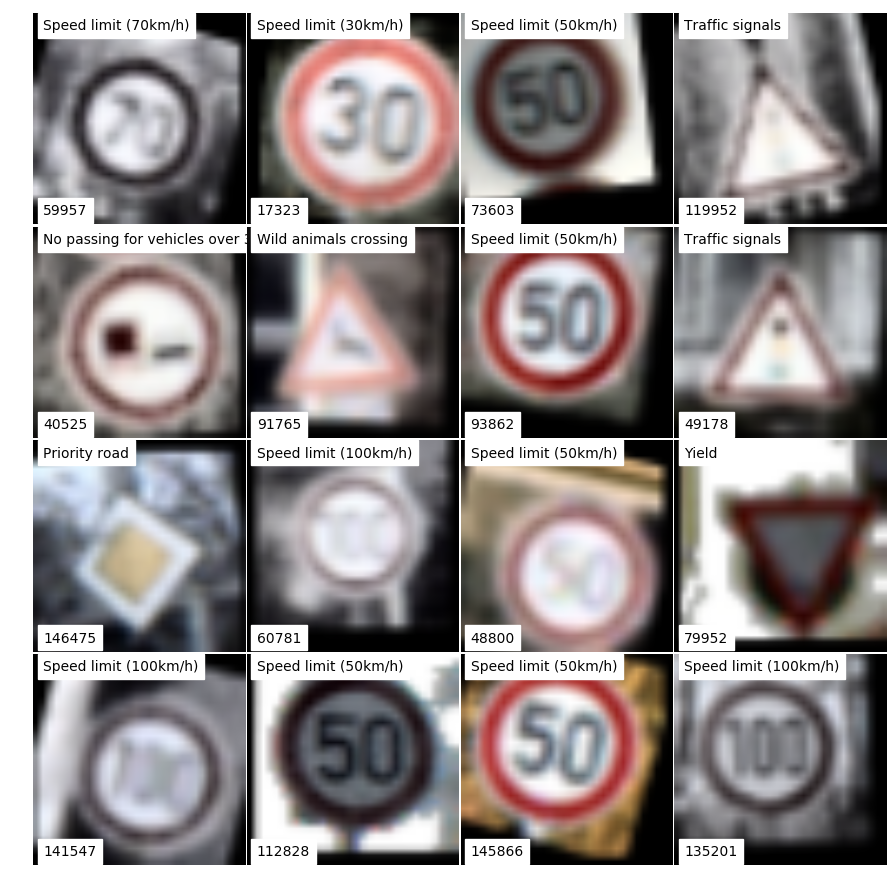

In [21]:
# for each image in the test set generate 5 jittered images to augment our training set
def augmentData(X_train, y_train, examples):
    X = []
    y = []
    for i in range(len(X_train)):
        for j in range(examples):
            img = jitterImage(X_train[i])
            X.append(img)
            y.append(y_train[i])
    X = np.array(X)
    y = np.array(y)
    return X, y

X_aug, y_aug = augmentData(X_train, y_train, 5)

pickle.dump({'X_aug': X_aug, 'y_aug': y_aug}, open('aug_train.p','wb'))

print("X_aug size: ", X_aug.shape)
print("y_aug size: ", y_aug.shape)

images, labels, indexes = randomImages(16, X_aug, y_aug)
plotImages(4,4, images, labels, indexes)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

In [22]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [23]:
EPOCHS = 50
BATCH_SIZE = 128

In [24]:
def createWeights(shape):
    sigma = 0.05
    mu = 0
    return tf.Variable(tf.truncated_normal(shape, mean = mu, stddev=sigma))

def createBiases(length):
    return tf.Variable(tf.zeros(length))

def convLayer(x, inputSize, filterSize, outputSize, pooling):
    shape = [filterSize, filterSize, inputSize, outputSize]
    W = createWeights(shape)
    b = createBiases(outputSize)
    layer = tf.nn.conv2d(x, W, strides = [1,1,1,1], padding = 'SAME')
    layer += b

    layer = tf.nn.relu(layer)
    
    if pooling:
        layer = tf.nn.max_pool(layer, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    return layer, W

def flattenLayer(X):
    shape = X.get_shape()
    features = shape[1:4].num_elements()
    Y = tf.reshape(X, [-1, features])
    return Y, features

def fcLayer(x, inputSize, outputSize, activate):
    W = createWeights([inputSize, outputSize])
    b = createBiases(outputSize)
    layer = tf.matmul(x, W) + b
    if activate:
        layer = tf.nn.relu(layer)

    return layer, W

def dropoutLayer(layer, keep):
    return tf.nn.dropout(layer, keep)

def regularize(weights):
    total = weights[0]
    for i in range(len(weights)):
        total += tf.nn.l2_loss(weights[i])
    return total

In [25]:
## Convlayer 0
filter_size0 = 1
num_filters0 = 3

## Convlayer 1
filter_size1 = 5
num_filters1 = 32

## Convlayer 2
filter_size2 = 5
num_filters2 = 32

## Convlayer 3
filter_size3 = 5
num_filters3 = 64

## Convlayer 4
filter_size4 = 5
num_filters4 = 64

## Convlayer 5
filter_size5 = 5
num_filters5 = 128

## Convlayer 6
filter_size6 = 5
num_filters6 = 128

## FC_size
fc_size1 = 1024

## FC_size
fc_size2 = 1024



In [26]:
## Architecture constructed here
# Notation CLX stands for convolution layer X i.e. CL0
# FCX stands for fully connected layer X i.e. FX0

features = tf.placeholder(tf.float32, shape=[None, 32, 32, 3], name='features')
y = tf.placeholder(tf.int32, (None), name='outputs')
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

CL0, CW0 = convLayer(features, 3, filter_size0, num_filters0, False)
CL1, CW1 = convLayer(CL0, num_filters0, filter_size1, num_filters1, False)
CL2, CW2 = convLayer(CL1, num_filters1, filter_size2, num_filters2, True)
CLD2 = dropoutLayer(CL2, keep_prob)

CL3, CW3 = convLayer(CLD2, num_filters2, filter_size3, num_filters3, False)
CL4, CW4 = convLayer(CL3, num_filters3, filter_size4, num_filters4, True)
CLD4 = dropoutLayer(CL4, keep_prob)

CL5, CW5 = convLayer(CLD4, num_filters4, filter_size5, num_filters5, False)
CL6, CW6 = convLayer(CL5, num_filters5, filter_size6, num_filters6, True)
CLD6 = dropoutLayer(CL6, keep_prob)

FL2, num_fc_layers2 = flattenLayer(CLD2)
FL4, num_fc_layers4 = flattenLayer(CLD4)
FL6, num_fc_layers6 = flattenLayer(CLD6)

FL = tf.concat(1, [FL2, FL4, FL6])
num_fc_layers = num_fc_layers2+num_fc_layers4+num_fc_layers6

FC1, FW1 = fcLayer(FL, num_fc_layers, fc_size1, True)
FCD1 = dropoutLayer(FC1, keep_prob)

FC2, FW2 = fcLayer(FCD1, fc_size1, fc_size2, True)
FCD2 = dropoutLayer(FC2, keep_prob)

logits, FW3 = fcLayer(FCD2, fc_size2, 43, False)

predProb = tf.nn.softmax(logits)
prediction = tf.argmax(predProb, 1)

R = regularize([CW0, CW1, CW2, CW4, CW4, CW5, CW6, FW1, FW2, FW3])

In [27]:
one_hot_y = tf.one_hot(y, 43)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

loss_operation = tf.reduce_mean(cross_entropy) #+ 1e-5 * R


# accucary calculation
correct_prediction = tf.equal(prediction, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [28]:
class Evaluator:
    def __init__(self, accuray, loss, batch_size):
        self.train_accuracy = []
        self.train_loss = []
        self.validation_accuracy = []
        self.validation_loss = []
        self.accuracy = accuracy
        self.loss = loss
        self.batch_size = batch_size
        
    def evaluate_epoch(self, X_train, y_train, X_validation, y_validation):
        accuracy = self.evaluate(self.batch_size, self.accuracy, X_train, y_train)
        self.train_accuracy.append(accuracy)
        accuracy = self.evaluate(self.batch_size, self.accuracy, X_validation, y_validation)
        self.validation_accuracy.append(accuracy)
        
        loss = self.evaluate(self.batch_size, self.loss, X_train, y_train)
        self.train_loss.append(loss)
        loss = self.evaluate(self.batch_size, self.loss, X_validation, y_validation)
        self.validation_loss.append(loss)
    
    def evaluate(self, batch_size, parameter, X_data, y_data):
        num_examples = len(X_data)
        total = 0
        sess = tf.get_default_session()
        for offset in range(0, num_examples, batch_size):
            batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
            value = sess.run(parameter, feed_dict={features: batch_x, y: batch_y, keep_prob: 1})
            total += (value * value)
        return total / num_examples

    def plot_accuracy(self):
        l1, = plt.plot(self.train_accuracy, label='Training Set')
        l2, = plt.plot(self.validation_accuracy, label='Validation Set')
        plt.legend(handles=[l1, l2])
        plt.ylabel('Accuracy')
        plt.xlabel('epochs')
        plt.show()
        
    def plot_loss(self):
        l1, = plt.plot(self.train_loss, label='Training Set')
        l2, = plt.plot(self.validation_loss, label='Validation Set')
        plt.legend(handles=[l1, l2])
        plt.ylabel('Loss')
        plt.xlabel('epochs')
        plt.show()

In [29]:
def train_model(X_train, y_train, X_validation, y_validation, config):
    epochs = config['epochs']
    batch_size = config['batch_size']
    
    evaluator = Evaluator(accuracy_operation, loss_operation, batch_size)
    
    # optimizer
    optimizer = tf.train.AdamOptimizer(learning_rate = config['learning_rate'])
    training_operation = optimizer.minimize(loss_operation)
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_train)
    
        print("Training "+str(num_examples)+" examples...")
        print()
        
        
        for i in range(epochs):
            X_train, y_train = shuffle(X_train, y_train)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = X_train[offset:end], y_train[offset:end]
                sess.run(training_operation, feed_dict={features: batch_x, y: batch_y, keep_prob: 1})
        
            evaluator.evaluate_epoch(X_train, y_train, X_validation, y_validation)
            print_progress(i+1, epochs)
        evaluator.plot_accuracy()
        evaluator.plot_loss()

In [30]:
config = {
    'learning_rate': 0.001,
    'epochs': 10,
    'batch_size': 256
}
#train_model(X_train[0:200], y_train[0:200], X_validation[0:200], y_validation[0:200], config)

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [31]:
### Train your model here.
### Feel free to use as many code cells as needed.

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [32]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

In [33]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

In [34]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.